# Hands On de Regresion
## Minería de Datos 2020

### 1.- Selección de Datos

**1.1**- Descargue los 2 csv (`train.csv` y `test.csv`) del aula virtual (mismo lugar donde encontró este archivo). Este dataset es una competencia sobre regresión del precio de venta de inmuebles en USA. El set de entrenamiento contiene la característica `SalePrice`, mientras el conjunto de prueba no la tiene. El objetivo del concurso es obtener el menor error en el conjunto de testing respecto a esta característica.

En el archivo `data_description.txt` usted podrá encontrar la descripción de cada característica.

**1.2**- Cargue los archivos en DataFrame pandas y muestre las estadísticas de las columnas para los dos conjuntos.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
print(df_train.info())
df_test.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [2]:
df_train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**PREGUNTA**: Si selecciona sólo las variables numéricas que no tengan NaN (hint: select_dtypes https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html), y separa del conjunto de training la variable objetivo (i.e, ``SalePrice``), tendrá dos matrices con las mismas características (esto será muy útil en la sección 2). Imprima el gráfico de dispersión del año de construcción vs el tamaño del garage de ambos conjuntos de datos. ¿Qué puede decir de estos dos conjuntos de datos (al menos respecto a estas dos variables)?

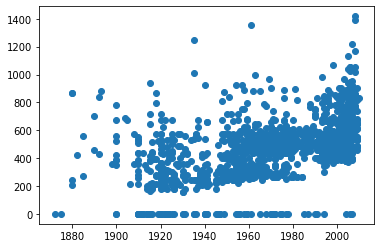

In [18]:
df_tnumeric = df_train.select_dtypes(include=['number'])
df_tnumeric.dropna()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_tnumeric['YearBuilt'],df_tnumeric['GarageArea'])
plt.show()


In [34]:
print(df_tnumeric)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

**1.3**- Muestre la matriz de correlación (con heatmap) **sólo** de aquellas características que tengan un valor mayor a 0.5 o menor -0.5 de correlación respecto al precio de venta.

KeyError: 1

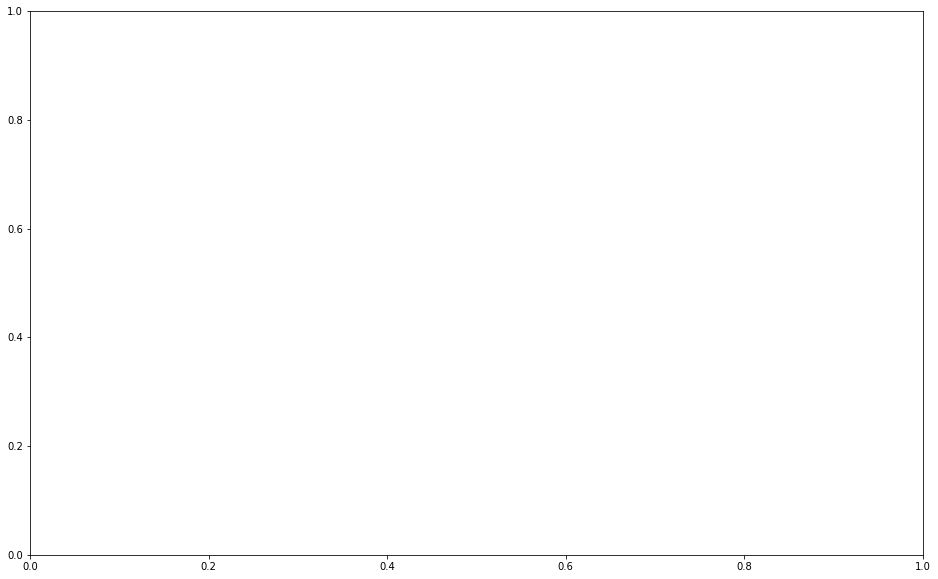

In [36]:
import seaborn as sns

def plot_corr_matrix (data,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    corr = data.corr()
   
    for i in range (1,len(corr)):
        for j in range (1,len(corr)):
            if( corr[i][j] > 0.5 or corr[i][j] < -0.5):
                    corr[i][j] = 0
                
            
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
plot_corr_matrix(df_tnumeric)
    

**PREGUNTA**: Utilizando la descripción de las características, explique cuales son los 3 factores que más inciden en el precio de una casa, y comente brevemente si le parecen razonables.

### 2- Regresión Lineal con Modelo Lineal en 1D

**2.1**- Haga un gráfico de dispersión por cada una de estas 3 características versus el precio de venta.

In [6]:
# ponga aquí su código

**PREGUNTA**: ¿Porqué sólo una de ellas es realmente apta para regresión en 1D? Si considera que hay más de una apta para regresión, elija una arbitrariamente.

**2.2**- Con la característica seleccionada, realice una regresión lineal regularizada con modelo lineal. Incluya tanto regresión Ridge como Lasso. Grafique los datos y la línea de regresión.

**RECOMENDACIONES**:
* Estandarice sus datos
* Elimine las muestras con datos faltantes.
* Cree funciones para realizar las pruebas más facilmente.

In [ ]:
# ponga aquí su código

**PREGUNTA**: ¿Qué valores de `alpha` debemos utilizar para cambiar el comportamiento de la regresión tanto en Ridge como en Lasso?

### 3- Regresión en ND
**3.1** Vuelva a utilizar todo el dataset, pero separe ahora el conjunto de entrenamiento en un conjunto de entrenamiento que contenga el 75% del original, y un conjunto de validación con el 25% del original (hint: `sklearn.model_selection`)

**RECOMENDACIONES**:
* Estandarice el set de entramiento y validación. Recuerde ocupar la misma tranformación para el testing.
* Elimine las muestras con datos faltantes y verifique que los conjuntos de entrenamiento y testing sean congruentes.
* Cree funciones para realizar las pruebas más facilmente.

In [ ]:
# ponga aquí su código

**PREGUNTA**: Comente las dificultades encontradas al hacer esta separación.

**3.2** Entrene ambos regresores regularizados para disntintos valores de `alpha` (100 valores distintos), y calcule el error cuadrático medio de entrenamiento y el error de validación. Con estos datos, gráfique la evolución del error de entrenamiento y validación dependiendo del peso de regularización. (hint: no calcule el error usted, ocupe `sklearn.metrics`)

In [1]:
# ponga aquí su código

**3.3** Haga lo mismo para el regresor `KernelRidge` con parámetro `kernel='rbf'`.

**PREGUNTA**: ¿Qué comportamiento observa? Si no observa ningún comportamiento, cambie los valores de `alpha`.

**3.4** Estime el precio de las casas en el conjunto de testing utilizando el mejor de los regresores con su mejor `alpha`. Grafíque la dispersión de cada característica de la sección 2.1 versus el precio de venta, tanto para los datos de training y testing en distintos colores.

In [3]:
# ponga aquí su código

**PREGUNTA FINAL**: ¿Cree usted que esta regresión funciona apropiadamente? Fundamente.